In [1]:
import random as rd
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
import shutil
import os

In [2]:
#Gifts generation
n_gifts = 3
max_tries = 200
verbose = True
#Roulette
total_frames_0 = 45
power = 1.2
start_slow_0 = 33

In [3]:
def initialization():
    family_dict = {
    "Maman":  {"is_Bretonniere": True,  "couple" : [""],      "gifts_to": [], "gifts_received":0},
    "PA":     {"is_Bretonniere": True,  "couple" : ["Lidia"], "gifts_to": [], "gifts_received":0}, 
    "Lidia":  {"is_Bretonniere": False, "couple" : ["PA"],    "gifts_to": [], "gifts_received":0},
    "Claire": {"is_Bretonniere": True,  "couple" : ["Adrien"],"gifts_to": [], "gifts_received":0},
    "Adrien": {"is_Bretonniere": False, "couple" : ["Claire"],"gifts_to": [], "gifts_received":0},
    "Arnaud": {"is_Bretonniere": True,  "couple" : ["AL"],    "gifts_to": [], "gifts_received":0},
    "AL":     {"is_Bretonniere": False, "couple" : ["Arnaud"],"gifts_to": [], "gifts_received":0},
    "Hubert": {"is_Bretonniere": False, "couple" : [""],      "gifts_to": [], "gifts_received":0}
    }
    return family_dict

In [4]:
family_dict=initialization()
n_people = len(family_dict)
max_combinations = math.comb(n_people-1,n_gifts)
people = list(family_dict.keys())

In [5]:
def check_bretonniere(test):
    has_bretonniere = any(family_dict[test[i]]['is_Bretonniere'] for i in range(len(test)))
    return has_bretonniere

In [6]:
#test = rd.sample(list(family_dict.keys()),k=n_gifts)

#print(test)
#print(type(test))
#person="AL"
#test=["AL","Adrien","Lidia"]
def validation(test, person):
    valid_list=True
#    check_bretonniere = has_bretonniere(test)
    if family_dict[person]["couple"][0] in test:
        if verbose:
            print("couple")
        valid_list=False
    has_bretonniere=check_bretonniere(test)
    if not has_bretonniere:
        if verbose:
            print("no Bretonniere")
        valid_list = False
    for gifted in test:
            if family_dict[gifted]["gifts_received"] >= 3:
                valid_list = False
#                print("Problem: already", family_dict[gifted]["gifts_received"], "gifts for ", gifted )
        
#optimized:
    #valid_list = not any(family_dict[gifted]["gifts_received"] >= 3 for gifted in test)
    return valid_list

#validation(test,person)

In [7]:
def display_gifts(family_dict):
    for p in list(family_dict.keys()):
        print(p,"offers to",family_dict[p]["gifts_to"], family_dict[k]["gifts_received"],"gifts received")               

In [8]:
for j in range(1,max_tries+1):
    print("try ",j)
    family_dict=initialization()
    for i in range(0,n_people):
        person=list(family_dict.keys())[i]
        print("Generating presents for ",person,"( try #",j,")",i)
        valid_list = False
        max=1
        tested_list=[]
        while not valid_list and max <= math.comb(n_people-1,n_gifts):
            reduced_list = [ name  for name in list(family_dict.keys()) if name != person]
            list_test = sorted(rd.sample(reduced_list,k=n_gifts))
            if not list_test in tested_list:
                tested_list.append(list_test)
                if verbose:
                    print("Testing",list_test, "(",max,"/",max_combinations,")")
                valid_list = validation(list_test,person)
                max+=1
            if max == max_combinations:
                if verbose:
                    print("all combinations tested")
                    if family_dict[gifted]["gifts_received"] != 3:
                        valid_list = False
                break 
            
        if valid_list:
            family_dict[person]["gifts_to"]=list_test
            for gifted in list(family_dict[person]["gifts_to"]):
                family_dict[gifted]["gifts_received"]+=1
                print("adding 1 present to",gifted,". Now has ",family_dict[gifted]["gifts_received"],"presents.")
            if verbose:
                for k in list(family_dict.keys()):
                    print(k)
                    print(family_dict[k]["gifts_to"],family_dict[k]["gifts_received"])
            print("----")
            if i==n_people-1:
                print("Found! (after ",j,"tries)")
                j=max_tries
                break
    
        else:
            print("No valid list found after ",j,"tries")
            display_gifts(family_dict)
            break
            
    if valid_list and i==n_people -1 :
        break
display_gifts(family_dict)     

try  1
Generating presents for  Maman ( try # 1 ) 0
Testing ['Arnaud', 'Claire', 'Hubert'] ( 1 / 35 )
adding 1 present to Arnaud . Now has  1 presents.
adding 1 present to Claire . Now has  1 presents.
adding 1 present to Hubert . Now has  1 presents.
Maman
['Arnaud', 'Claire', 'Hubert'] 0
PA
[] 0
Lidia
[] 0
Claire
[] 1
Adrien
[] 0
Arnaud
[] 1
AL
[] 0
Hubert
[] 1
----
Generating presents for  PA ( try # 1 ) 1
Testing ['Adrien', 'Arnaud', 'Maman'] ( 1 / 35 )
adding 1 present to Adrien . Now has  1 presents.
adding 1 present to Arnaud . Now has  2 presents.
adding 1 present to Maman . Now has  1 presents.
Maman
['Arnaud', 'Claire', 'Hubert'] 1
PA
['Adrien', 'Arnaud', 'Maman'] 0
Lidia
[] 0
Claire
[] 1
Adrien
[] 1
Arnaud
[] 2
AL
[] 0
Hubert
[] 1
----
Generating presents for  Lidia ( try # 1 ) 2
Testing ['Adrien', 'Arnaud', 'PA'] ( 1 / 35 )
couple
Testing ['Adrien', 'Maman', 'PA'] ( 2 / 35 )
couple
Testing ['Adrien', 'Arnaud', 'Maman'] ( 3 / 35 )
adding 1 present to Adrien . Now has  2 pres

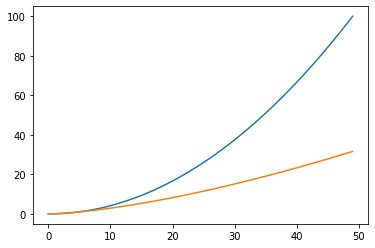

In [9]:
x = np.linspace(0, 10)
plt.plot(x**2)
plt.plot(x**(1.5))


In [10]:
#instead of the generate_random_sequence that generates numbers (with no 2 consecutive ones), we generate a list of names
def generate_random_names_sequence(n,people):
    rd.shuffle(people)
    random_names_sequence = []

    for i in range(n):
    # Ensure that consecutive elements are not the same
        while True:
            name = rd.choice(people)
            if not random_names_sequence or random_names_sequence[-1] != name:
                random_names_sequence.append(name)
                break
    return random_names_sequence

generate_random_names_sequence(10,people)

['PA',
 'Claire',
 'Maman',
 'Lidia',
 'Hubert',
 'Adrien',
 'Lidia',
 'PA',
 'Claire',
 'Arnaud']

In [11]:
nb=1
gifter="Lidia"
index_gifter = people.index(gifter)
print("index_gifter:",index_gifter)
print("-")
print(family_dict[gifter]["gifts_to"])
print("--")
#print(family_dict[list(family_dict.keys())[nb]])
print("---")
#print(family_dict[list(family_dict.keys())[nb]]["gifts_to"][0])
rdms = generate_random_names_sequence(10,people)
for i,nb in enumerate(rdms):
    print(i,nb)

index_gifter: 0
-
['Adrien', 'Arnaud', 'Maman']
--
---
0 Claire
1 AL
2 Hubert
3 AL
4 Maman
5 Hubert
6 Claire
7 Arnaud
8 Maman
9 AL


In [12]:
def create_image_list(gifter,family_dict,total_frames):

    #La derniere image de "gifter", c'est "pics/"+family_dict[gifter]["gifts_to"][i]+".png", avec i=0,1,2 . C'est ça qu'il faut mettre.

    list_imgs_0 = []
    list_imgs_1 = []
    list_imgs_2 = []
    people = list(family_dict.keys())
    rdms = generate_random_names_sequence(total_frames,people)
    for i, nb in enumerate(rdms):
        if i < start_slow_0:
            list_imgs_0.append("web/pics/"+nb+".png")
        if ((i > start_slow_0) & (i < total_frames)):
            for j in range(int((i-start_slow_0)**(power))):
 #               list_imgs_0.append(nb) -> 
 #               list_imgs_0.append("pics/"+family_dict[gifter]["gifts_to"][0]+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_0
                list_imgs_0.append("web/pics/"+nb+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_0
#Là c'est completement random, comme toi avant


    start_slow_1 = int(3*len(list_imgs_0) / 4)
# 
# change last roulette0 here

    rdms1 = generate_random_names_sequence(start_slow_1,people)
    rdms2 = generate_random_names_sequence(start_slow_1,people)

    for i, nb in enumerate(rdms1):
        list_imgs_1.append("web/pics/"+nb+".png")
        list_imgs_2.append("web/pics/"+rdms2[i]+".png")
    #    list_imgs_0.append(list_imgs_0[-1])
        list_imgs_0.append("web/pics/"+family_dict[gifter]["gifts_to"][0]+".png") #c'est que là que je mets la derniere image
                


    rdms = generate_random_names_sequence(total_frames,people)

    for i, nb in enumerate(rdms):
        if i < start_slow_0:
#            list_imgs_1.append("pics/"+family_dict[gifter]["gifts_to"][1]+".png")
            list_imgs_1.append("web/pics/"+nb+".png")

        if ((i > start_slow_0) & (i < total_frames)):
            for j in range(int((i-start_slow_0)**(power))):
#                list_imgs_1.append(nb%8)
#                list_imgs_1.append("pics/"+family_dict[gifter]["gifts_to"][1]+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_1
                list_imgs_1.append("web/pics/"+nb+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_1
 #Là c'est completement random, comme toi avant

    start_slow_2 = int(1*len(list_imgs_1) / 2)

# change last roulette1 here

    rdms = generate_random_names_sequence(start_slow_2,people)

    for i, nb in enumerate(rdms):
        list_imgs_2.append("web/pics/"+nb+".png")  #Là c'est completement random, comme toi avant

#        list_imgs_2.append(nb%8)
#        list_imgs_1.append(list_imgs_1[-1])
        list_imgs_1.append("web/pics/"+family_dict[gifter]["gifts_to"][1]+".png") #c'est que là que je mets la derniere image
        list_imgs_0.append(list_imgs_0[-1]) #là je continue à repeter la meme image (non aleatoire) pour le 1er cadran

    rdms = generate_random_names_sequence(start_slow_2,people)

    for i, nb in enumerate(rdms):
        if i < start_slow_0:
#            list_imgs_2.append("pics/"+family_dict[gifter]["gifts_to"][2]+".png")
            list_imgs_2.append("web/pics/"+nb+".png")  #Là c'est completement random, comme toi avant



        if ((i > start_slow_0) & (i < total_frames)):
            for j in range(int((i-start_slow_0)**(power))):
#                list_imgs_2.append(nb%8) 
#                list_imgs_2.append("pics/"+family_dict[gifter]["gifts_to"][2]+".png") #not sure if should be done here. but this is the index of the last image for list_imgs_2
                list_imgs_2.append("web/pics/"+nb+".png")  #Là c'est completement random, comme toi avant

                
    list_imgs_2[-1]="web/pics/"+family_dict[gifter]["gifts_to"][2]+".png" #je remplace vraiment que la toute derniere image pour le 3e cadran

    total_frames = len(list_imgs_2)
    print(total_frames)
    print("last frame of each:",list_imgs_0[-1],list_imgs_1[-1],list_imgs_2[-1])
    return list_imgs_0, list_imgs_1, list_imgs_2, total_frames
    
# change last roulette1 here

In [13]:
total_frames_0

45

In [14]:
gifter="Lidia"
print(family_dict[gifter]["gifts_to"])

['Adrien', 'Arnaud', 'Maman']


In [15]:
    list_imgs_0, list_imgs_1, list_imgs_2, total_frames = create_image_list("Lidia",family_dict,total_frames_0)

327
last frame of each: web/pics/Adrien.png web/pics/Arnaud.png web/pics/Maman.png


In [16]:
list_imgs_2
for i in range(24):
    print(i,i%8)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 0
9 1
10 2
11 3
12 4
13 5
14 6
15 7
16 0
17 1
18 2
19 3
20 4
21 5
22 6
23 7


In [17]:
for i in range(n_people):
    person=people[i]
    print(person)
    list_imgs_0, list_imgs_1, list_imgs_2, total_frames = create_image_list(person,family_dict,total_frames_0)

PA
327
last frame of each: web/pics/AL.png web/pics/Hubert.png web/pics/Maman.png
Claire
327
last frame of each: web/pics/AL.png web/pics/Hubert.png web/pics/Maman.png
Hubert
327
last frame of each: web/pics/Adrien.png web/pics/Arnaud.png web/pics/Claire.png
Maman
327
last frame of each: web/pics/AL.png web/pics/Hubert.png web/pics/PA.png
Arnaud
327
last frame of each: web/pics/Claire.png web/pics/Lidia.png web/pics/PA.png
AL
327
last frame of each: web/pics/Adrien.png web/pics/Claire.png web/pics/Lidia.png
Adrien
327
last frame of each: web/pics/Arnaud.png web/pics/Lidia.png web/pics/PA.png
Lidia
327
last frame of each: web/pics/Adrien.png web/pics/Arnaud.png web/pics/Maman.png


In [18]:
print(list_imgs_0)
print(list_imgs_1)
print(list_imgs_2)

['web/pics/Lidia.png', 'web/pics/Maman.png', 'web/pics/Claire.png', 'web/pics/Lidia.png', 'web/pics/AL.png', 'web/pics/Arnaud.png', 'web/pics/Claire.png', 'web/pics/AL.png', 'web/pics/Claire.png', 'web/pics/Hubert.png', 'web/pics/Lidia.png', 'web/pics/AL.png', 'web/pics/Claire.png', 'web/pics/Arnaud.png', 'web/pics/AL.png', 'web/pics/Maman.png', 'web/pics/Lidia.png', 'web/pics/Hubert.png', 'web/pics/Maman.png', 'web/pics/Claire.png', 'web/pics/Hubert.png', 'web/pics/PA.png', 'web/pics/Lidia.png', 'web/pics/Hubert.png', 'web/pics/Adrien.png', 'web/pics/Arnaud.png', 'web/pics/Adrien.png', 'web/pics/Claire.png', 'web/pics/PA.png', 'web/pics/Adrien.png', 'web/pics/Arnaud.png', 'web/pics/PA.png', 'web/pics/Hubert.png', 'web/pics/Arnaud.png', 'web/pics/Adrien.png', 'web/pics/Adrien.png', 'web/pics/Lidia.png', 'web/pics/Lidia.png', 'web/pics/Lidia.png', 'web/pics/Maman.png', 'web/pics/Maman.png', 'web/pics/Maman.png', 'web/pics/Maman.png', 'web/pics/Maman.png', 'web/pics/AL.png', 'web/pics/AL

In [19]:
def create_video(gifter,family_dict,total_frames_0):

    list_imgs_0, list_imgs_1, list_imgs_2, total_frames = create_image_list(gifter,family_dict,total_frames_0)
    fig, ax = plt.subplots(1, 3, figsize=(17, 5))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    fig.patch.set_facecolor([150/255, 40/255, 28/255])
    def init_video():
        ax[0].clear()
        return []
    
    def update_video(frame):
#     print(frame+1%8)
        ax[0].clear()
    # Your plotting code here
        ax[0].imshow(Image.open(list_imgs_0[frame]))
    
        ax[1].clear()
    # Your plotting code here
        ax[1].imshow(Image.open(list_imgs_1[frame]))
    
        ax[2].clear()
    # Your plotting code here
        ax[2].imshow(Image.open(list_imgs_2[frame]))
        for i in range(3):
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    ani = FuncAnimation(fig, update_video, frames=total_frames, init_func=init_video, repeat=False, interval=50)
    ani.save("web/"+gifter+'/roulette.mp4')#, dpi=5)

PA gifts to: ['AL', 'Hubert', 'Maman']
327
last frame of each: web/pics/AL.png web/pics/Hubert.png web/pics/Maman.png
Claire gifts to: ['AL', 'Hubert', 'Maman']
327
last frame of each: web/pics/AL.png web/pics/Hubert.png web/pics/Maman.png
Hubert gifts to: ['Adrien', 'Arnaud', 'Claire']
327
last frame of each: web/pics/Adrien.png web/pics/Arnaud.png web/pics/Claire.png
Maman gifts to: ['AL', 'Hubert', 'PA']
327
last frame of each: web/pics/AL.png web/pics/Hubert.png web/pics/PA.png
Arnaud gifts to: ['Claire', 'Lidia', 'PA']
327
last frame of each: web/pics/Claire.png web/pics/Lidia.png web/pics/PA.png
AL gifts to: ['Adrien', 'Claire', 'Lidia']
327
last frame of each: web/pics/Adrien.png web/pics/Claire.png web/pics/Lidia.png
Adrien gifts to: ['Arnaud', 'Lidia', 'PA']
327
last frame of each: web/pics/Arnaud.png web/pics/Lidia.png web/pics/PA.png
Lidia gifts to: ['Adrien', 'Arnaud', 'Maman']
327
last frame of each: web/pics/Adrien.png web/pics/Arnaud.png web/pics/Maman.png


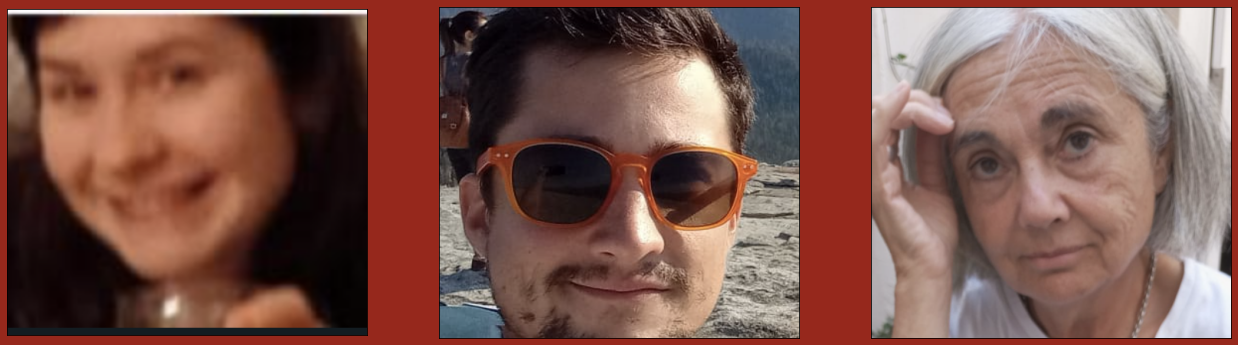

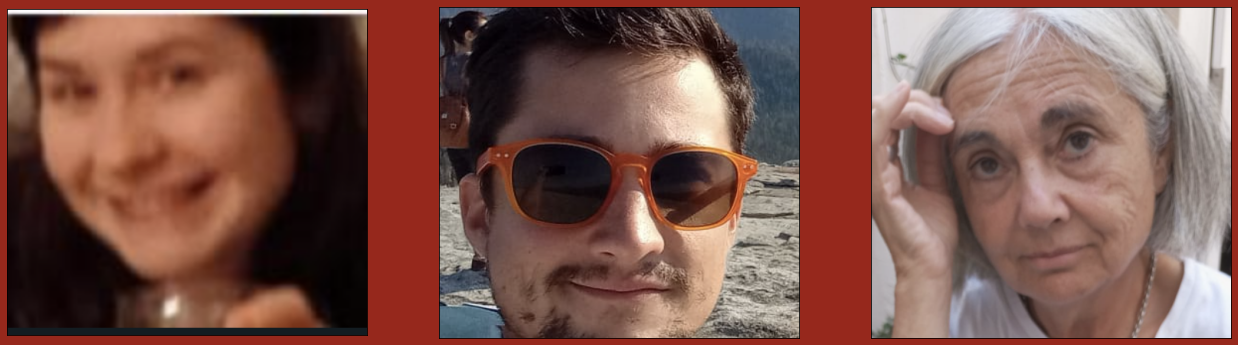

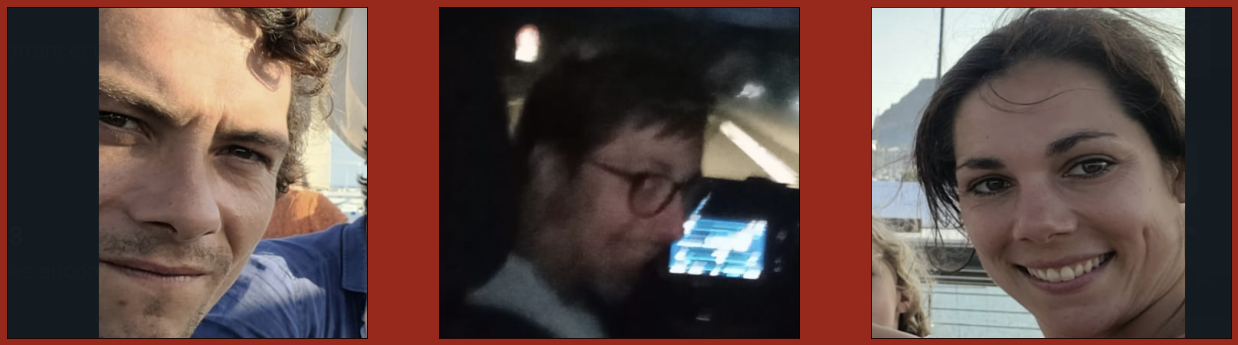

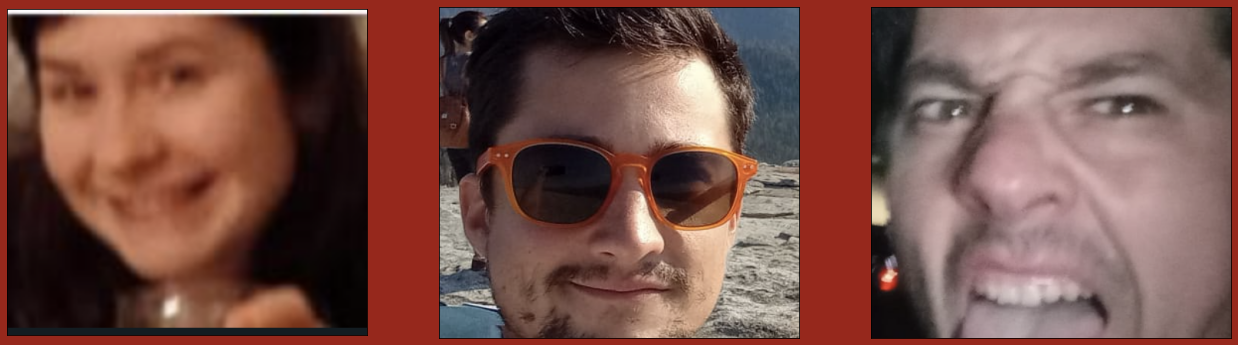

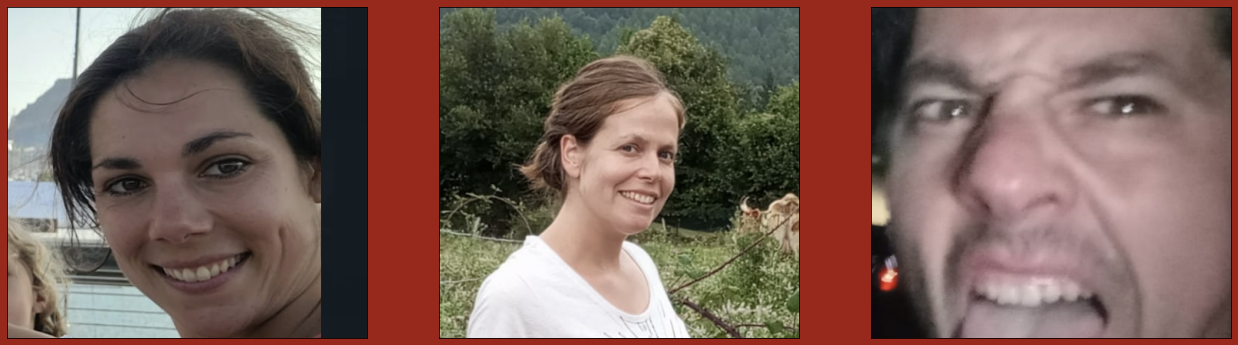

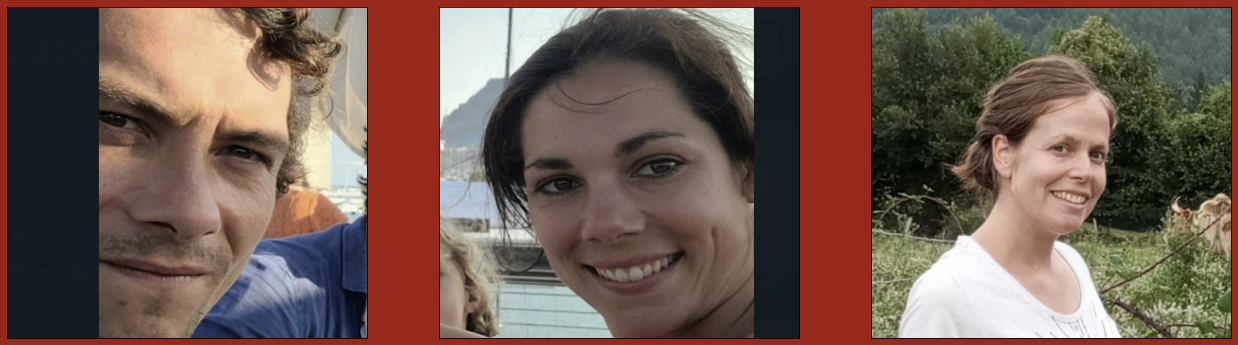

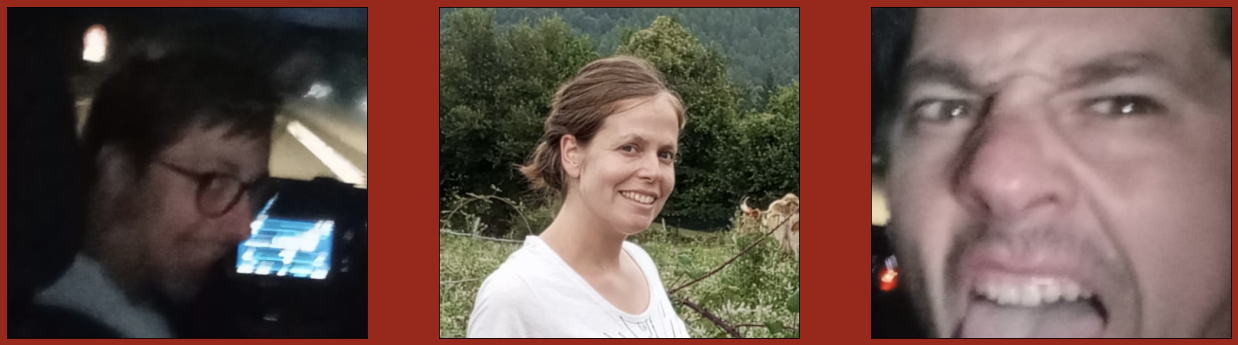

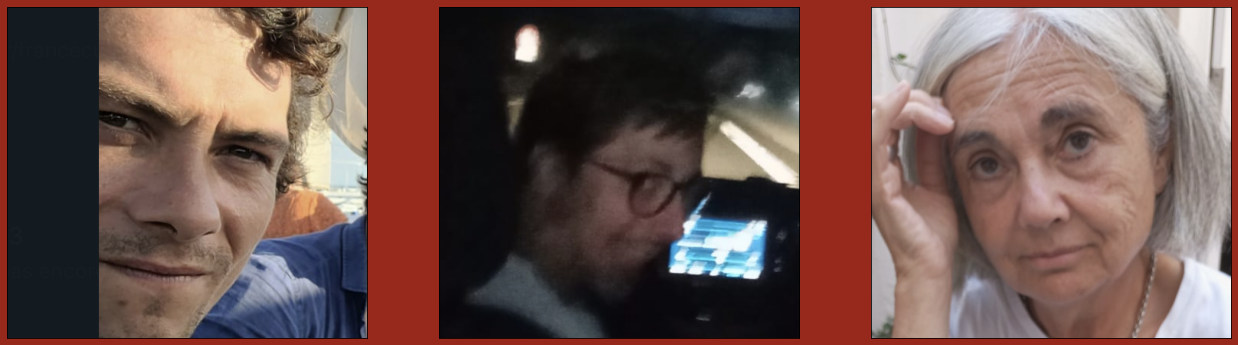

In [20]:
#gifter="PA"
for gifter in people:
    print(gifter,"gifts to:",family_dict[gifter]["gifts_to"])
    create_video(gifter,family_dict,total_frames_0)
#wrong display: is it because it doesn't show the last image of the video or because the last image of the video is wrong (then see previous comments)


In [22]:
print(family_dict)
gifter="PA"
gifted=family_dict[gifter]["gifts_to"]
print("gifted",gifted)

gifters_0 = [person for person, details in family_dict.items() if gifted[0] in details["gifts_to"]]
print(gifters_0)

other_gifters = [giver for giver in gifters_0 if giver != gifter ]    
print(other_gifters)

{'Maman': {'is_Bretonniere': True, 'couple': [''], 'gifts_to': ['AL', 'Hubert', 'PA'], 'gifts_received': 3}, 'PA': {'is_Bretonniere': True, 'couple': ['Lidia'], 'gifts_to': ['AL', 'Hubert', 'Maman'], 'gifts_received': 3}, 'Lidia': {'is_Bretonniere': False, 'couple': ['PA'], 'gifts_to': ['Adrien', 'Arnaud', 'Maman'], 'gifts_received': 3}, 'Claire': {'is_Bretonniere': True, 'couple': ['Adrien'], 'gifts_to': ['AL', 'Hubert', 'Maman'], 'gifts_received': 3}, 'Adrien': {'is_Bretonniere': False, 'couple': ['Claire'], 'gifts_to': ['Arnaud', 'Lidia', 'PA'], 'gifts_received': 3}, 'Arnaud': {'is_Bretonniere': True, 'couple': ['AL'], 'gifts_to': ['Claire', 'Lidia', 'PA'], 'gifts_received': 3}, 'AL': {'is_Bretonniere': False, 'couple': ['Arnaud'], 'gifts_to': ['Adrien', 'Claire', 'Lidia'], 'gifts_received': 3}, 'Hubert': {'is_Bretonniere': False, 'couple': [''], 'gifts_to': ['Adrien', 'Arnaud', 'Claire'], 'gifts_received': 3}}
gifted ['AL', 'Hubert', 'Maman']
['Maman', 'PA', 'Claire']
['Maman', 'Cl

In [28]:
def copy_files(gifter,family_dict):
    print("gifter",gifter)
    gifted=family_dict[gifter]["gifts_to"]
    print("gifted",gifted)
    if not os.path.isdir(os.path.join("web",gifter,"lutins")):
        os.mkdir(os.path.join("web",gifter,"lutins"))
    for i in range(3):
        print("gifted",i,gifted[i])
        shutil.copy("web/pics/"+gifted[i]+".png",os.path.join("web",gifter,"gifted"+str(i+1)+".png"))
        lutins = [person for person, details in family_dict.items() if gifted[i] in details["gifts_to"]]
        other_lutins = [giver for giver in lutins if giver != gifter ]
        print("other_lutins",other_lutins)
        for j in range(2):
            shutil.copy(os.path.join("web/pics/lutins",other_lutins[j]+".jpg"),os.path.join("web",gifter,"lutins/lutin"+str(i+1)+str(j+1)+".jpg"))

In [29]:
for gifter in people:       
    copy_files(gifter,family_dict)

gifter PA
gifted ['AL', 'Hubert', 'Maman']
gifted 0 AL
other_lutins ['Maman', 'Claire']
gifted 1 Hubert
other_lutins ['Maman', 'Claire']
gifted 2 Maman
other_lutins ['Lidia', 'Claire']
gifter Claire
gifted ['AL', 'Hubert', 'Maman']
gifted 0 AL
other_lutins ['Maman', 'PA']
gifted 1 Hubert
other_lutins ['Maman', 'PA']
gifted 2 Maman
other_lutins ['PA', 'Lidia']
gifter Hubert
gifted ['Adrien', 'Arnaud', 'Claire']
gifted 0 Adrien
other_lutins ['Lidia', 'AL']
gifted 1 Arnaud
other_lutins ['Lidia', 'Adrien']
gifted 2 Claire
other_lutins ['Arnaud', 'AL']
gifter Maman
gifted ['AL', 'Hubert', 'PA']
gifted 0 AL
other_lutins ['PA', 'Claire']
gifted 1 Hubert
other_lutins ['PA', 'Claire']
gifted 2 PA
other_lutins ['Adrien', 'Arnaud']
gifter Arnaud
gifted ['Claire', 'Lidia', 'PA']
gifted 0 Claire
other_lutins ['AL', 'Hubert']
gifted 1 Lidia
other_lutins ['Adrien', 'AL']
gifted 2 PA
other_lutins ['Maman', 'Adrien']
gifter AL
gifted ['Adrien', 'Claire', 'Lidia']
gifted 0 Adrien
other_lutins ['Lidia', 